In [2]:
# when not using colab
import sys
sys.path.append('src/QA')
import reload_recursive

In [3]:
%reload word_embed
from word_embed import WordEmbed

In [190]:
%reload data_prep
from data_prep import DataPrep

In [5]:
import pickle

In [227]:
results = pickle.load(open("models/results.pkl", "rb"))

In [228]:
# find the best model on the results given
# chooses the highest seen test f1 score
def get_best_model(results):
    best_f1_seen = 0.0
    best_model = None
    best_model_it = None
    for key, value in results.items():
        for it, model_results in value.items():
            model_f1 = model_results["test_report"]["1"]["f1-score"]
            if model_f1 > best_f1_seen:
                best_f1_seen = model_f1
                best_model = {key: value}
                best_model_it = it
    
    return best_f1_seen, best_model, best_model_it

In [229]:
best_f1_seen, best_model, best_model_it = get_best_model(results)

In [246]:
best_model

{frozenset({('answer_type', 'Out_And_In'),
            ('attention_type', 'Dot Product'),
            ('batch', 128),
            ('befaft', False),
            ('bidirectional', False),
            ('doc_cut_size', 256),
            ('doc_hidden_layers', 2),
            ('doc_with_ner', True),
            ('doc_with_pos', False),
            ('doc_with_tfidf', False),
            ('doc_with_wm', False),
            ('hidden_size', 100),
            ('hidden_type', 'GRU'),
            ('iters_inc', (1, 4, 5, 10, 20, 40)),
            ('learning_rate', 0.1),
            ('q_cut_size', 'Max'),
            ('q_with_ner', False),
            ('q_with_pos', True)}): {1: {'train_loss': tensor(0.6958),
   'train_report': {'0': {'precision': 0.9996054541086485,
     'recall': 0.9447349815494068,
     'f1-score': 0.9713959787339447,
     'support': 541717},
    '1': {'precision': 0.0011010643622168096,
     'recall': 0.14042553191489363,
     'f1-score': 0.002184996358339403,
     'support': 23

In [232]:
def get_keys_from_model(model):
    return dict(list(model.items())[0][0])

In [233]:
best_model_params = get_keys_from_model(best_model)

In [234]:
def remove_param(param, name):
    cut_param = dict(param)
    del cut_param[name]
    return cut_param

In [235]:
bm_without_hidden_layers = remove_param(best_model_dict, "doc_hidden_layers")

In [236]:
%reload model
import model
from model.results_helpers import ResultsHelper

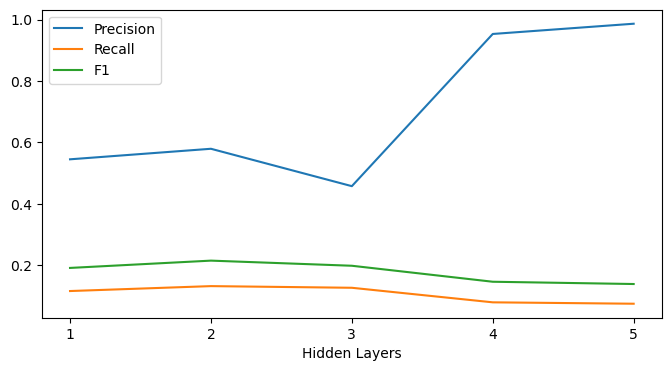

In [237]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
ResultsHelper.plot_metrics_for_one_it(ResultsHelper.get_matching_models(bm_without_hidden_layers, results), var_X = "doc_hidden_layers", var_X_pretty_name = "Hidden Layers", it=40, train=False)
plt.legend()
plt.show()

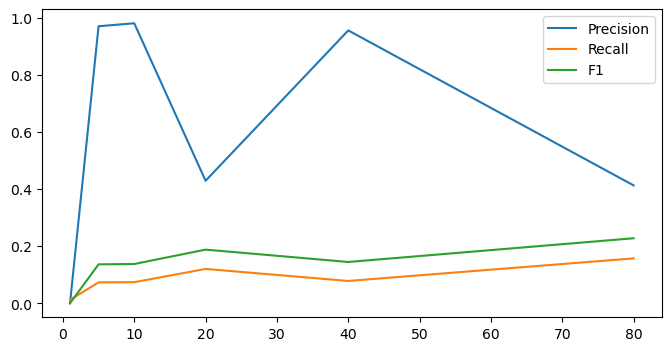

In [238]:
plt.figure(figsize=(8,4))
ResultsHelper.plot_metrics_over_its(best_model, train=False)
plt.legend()
plt.show()

## Best RNN models with 1 hidden layer

In [178]:
best_rnn_1_layer_model = get_best_model(ResultsHelper.get_matching_models({"hidden_type": "RNN", "doc_hidden_layers": 1}, results))[1]

In [179]:
best_rnn_1_layer_model_params = get_keys_from_model(best_rnn_1_layer_model)
rnn_1_layer_vary_attention_type = remove_param(rnn_1_layer_vary_attention_type, "attention_type")

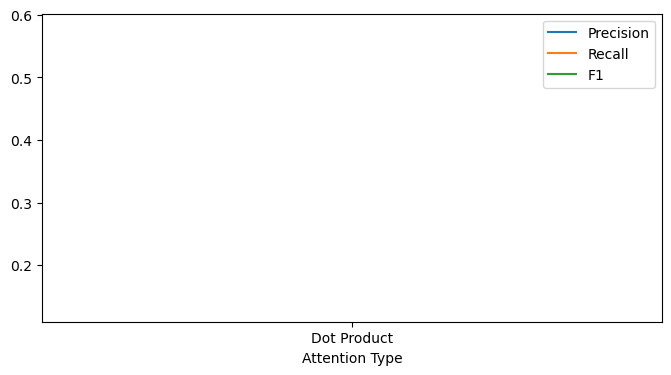

In [156]:
bm_without_attention_type = remove_param(best_model_params, "attention_type")
plt.figure(figsize=(8,4))
ResultsHelper.plot_metrics_for_one_it(ResultsHelper.get_matching_models(bm_without_attention_type, results), var_X = "attention_type", var_X_pretty_name = "Attention Type", it=40, train=False)
plt.legend()
plt.show()

## Examine doc lengths

In [191]:
train_q_inputs, train_doc_inputs, train_doc_targets = DataPrep.tokenize_json(DataPrep.convert_pd_to_json(DataPrep.parse_tsv('WikiQA-train.tsv')))
test_q_inputs, test_doc_inputs, test_doc_targets = DataPrep.tokenize_json(DataPrep.convert_pd_to_json(DataPrep.parse_tsv('WikiQA-test.tsv')))

In [209]:
train_doc_full = [[tok for sentence in doc for tok in sentence] for doc in train_doc_inputs]
test_doc_full = [[tok for sentence in doc for tok in sentence] for doc in test_doc_inputs]

In [213]:
train_doc_lens = [len(doc) for doc in train_doc_full]
test_doc_lens = [len(doc) for doc in test_doc_full]

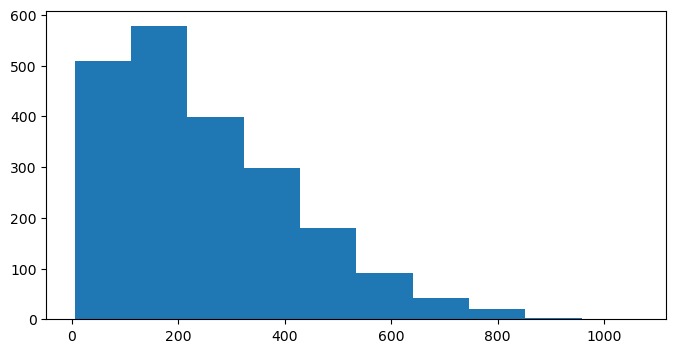

In [217]:
plt.figure(figsize=(8,4))
plt.hist(train_doc_lens)
plt.show()

In [239]:
models_large_its = ResultsHelper.get_matching_models({'iters_inc': (1, 4, 5, 10, 20, 40, 80)}, results)